In [1]:
import random
import numpy as np
from metu.data_utils import load_nextchar_dataset, plain_text_file_to_dataset
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.
from cs231n.classifiers.mneural_net_for_regression import NLayerNet

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5
sizes = [input_size+1, 11, num_classes]

def init_toy_model():
  np.random.seed(0)
  return NLayerNet(sizes, std=1e-1)

def init_toy_data():
  np.random.seed(1)
  X = 10 * np.random.randn(num_inputs, input_size+1)
  X[:,input_size] = 1
  y = np.array([[0, 1, 2], [1, 2, 3], [2, 3, 4], [2, 1, 4], [2, 1, 4]])
  return X, y

net = init_toy_model()
X, y = init_toy_data()

In [3]:
scores = net.loss(X)
print 'Your scores:'
print scores
print

Your scores:
[[ 0.2542827  -1.0276132   0.22463379]
 [ 0.30083018  0.03165373  0.49757504]
 [ 0.23566155 -1.43767861  0.60140783]
 [ 0.06658625  0.00252092  0.11141789]
 [ 0.01875262 -0.14184773  0.02989631]]



In [4]:
loss, _ = net.loss(X, y, reg=0.1)
print loss

46.6173034791


In [5]:
# Load the TEXT data
# If your memory turns out to be sufficient, try the following:
#def get_nextchar_data(training_ratio=0.6, val_ratio=0.1):
def get_nextchar_data(training_ratio=0.1, test_ratio=0.06, val_ratio=0.01):
  # Load the nextchar training data 
  X, y = load_nextchar_dataset(nextchar_datafile)
  # Subsample the data
  length=len(y)
  num_training=int(length*training_ratio)
  num_val = int(length*val_ratio)
  num_test = min((length-num_training-num_val), int(length*test_ratio))
  mask = range(num_training-1)
  X_train = X[mask]
  y_train = y[mask]
  mask = range(num_training, num_training+num_test)
  X_test = X[mask]
  y_test = y[mask]
  mask = range(num_training+num_test, num_training+num_test+num_val)
  X_val = X[mask]
  y_val = y[mask]

  return X_train, y_train, X_val, y_val, X_test, y_test

nextchar_datafile = 'metu/dataset/nextchar_data.pkl'
input_size = 5 # Size of the input of the network
#plain_text_file_to_dataset("metu/dataset/ince_memed_1.txt", nextchar_datafile, input_size)
plain_text_file_to_dataset("metu/dataset/shakespeare.txt", nextchar_datafile, input_size)
X_train, y_train, X_val, y_val, X_test, y_test = get_nextchar_data()
#convert labels
#y_train = np.c_[X_train[:,1:], y_train].astype(int)
#y_val = np.c_[X_val[:,1:], y_val].astype(int)
#y_test = np.c_[X_test[:,1:], y_test].astype(int)
#add bias columns
X_train = np.c_[X_train, np.ones(X_train.shape[0])].astype(int)
X_val = np.c_[X_val, np.ones(X_val.shape[0])].astype(int)
X_test = np.c_[X_test, np.ones(X_test.shape[0])].astype(int)
print "Number of instances in the training set: ", len(X_train)
print "Number of instances in the validation set: ", len(X_val)
print "Number of instances in the testing set: ", len(X_test)

Converting plain text file to trainable dataset (as pickle file)
Processing file metu/dataset/shakespeare.txt as input
input_size parameter (i.e. num of neurons) will be 5
Writing data and labels to file metu/dataset/nextchar_data.pkl
Loading X and Y from pickle file metu/dataset/nextchar_data.pkl
Number of instances in the training set:  37647
Number of instances in the validation set:  3764
Number of instances in the testing set:  22589


In [6]:
# We have loaded the dataset. That wasn't difficult, was it? :)
# Let's look at a few samples
#
from metu.data_utils import int_list_to_string, int_to_charstr

print "Input - Next char to be predicted"
for i in range(1,10):
    print int_list_to_string(X_train[i]) + " - " + int_list_to_string(y_train[i])

Input - Next char to be predicted
HE SO - N
E SON - N
 SONN - E
SONNE - T
ONNET - S
by Wi - l
y Wil - l
 Will - i
Willi - a


# Approach1: Multiple layer NN

**Lets try a NN with 3 Layers, instead of 2. Again we use regression with squared error loss function and ReLU activation function.**

In [7]:
# Now, let's train a neural network

input_size = 5
hidden_size = 5000
num_classes = 1
sizes = [input_size+1, hidden_size/100, hidden_size, num_classes]
net = NLayerNet(sizes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=5000, batch_size=32*4,
            learning_rate=6e-7, learning_rate_decay=0.97,
            reg=10, verbose=True)

# Predict on the validation set
val_err = np.sum(np.square(net.predict(X_val) - y_val), axis=1).mean()
print 'Validation error: ', val_err
test_err = np.sum(np.square(net.predict(X_test) - y_test), axis=1).mean()
print 'Test error: ', test_err

iteration 0 / 5000: loss 546327.512261
iteration 100 / 5000: loss 573085.500313
iteration 200 / 5000: loss 522045.439926
iteration 300 / 5000: loss 556642.340921
iteration 400 / 5000: loss 562255.650729
iteration 500 / 5000: loss 111373.144695
iteration 600 / 5000: loss 156501.872581
iteration 700 / 5000: loss 156517.125092
iteration 800 / 5000: loss 79022.478132
iteration 900 / 5000: loss 97902.328317
iteration 1000 / 5000: loss 130926.662905
iteration 1100 / 5000: loss 114998.455899
iteration 1200 / 5000: loss 137790.050439
iteration 1300 / 5000: loss 308434.968690
iteration 1400 / 5000: loss 76892.223163
iteration 1500 / 5000: loss 130901.837214
iteration 1600 / 5000: loss 104809.187718
iteration 1700 / 5000: loss 77751.193665
iteration 1800 / 5000: loss 67174.459979
iteration 1900 / 5000: loss 125493.522229
iteration 2000 / 5000: loss 68323.243654
iteration 2100 / 5000: loss 75575.385475
iteration 2200 / 5000: loss 54534.012705
iteration 2300 / 5000: loss 61936.244708
iteration 240

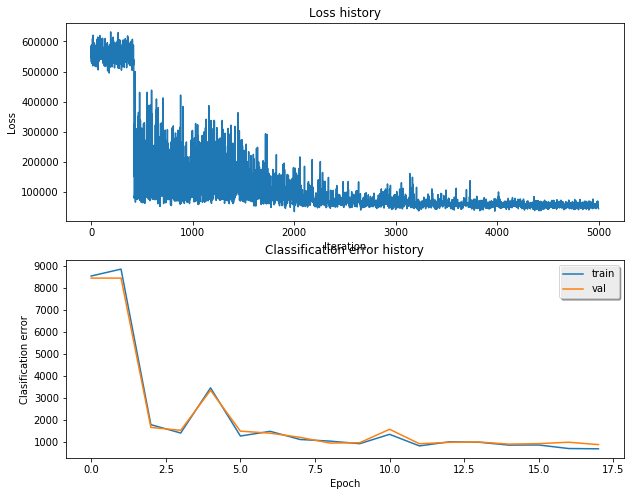

In [8]:
# Plot the loss function and train / validation errors
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
train = plt.plot(stats['train_err_history'], label='train')
val = plt.plot(stats['val_err_history'], label='val')
plt.legend(loc='upper right', shadow=True)
plt.title('Classification error history')
plt.xlabel('Epoch')
plt.ylabel('Clasification error')
plt.show()

**It seems like we are hitting a local minima which is too narrow and steep, I've come up with that conclusion by trying different learning rates, architectures, regularization strengths and batch sizes and that optima has been missed in most of them, which failed to converge to any better parameter set than our original guess.**

# Approach2: Multiple Outputs sort of AutoEncoding

We will try to change our outputs from just one character to previous characters and the character to be predicted, with that approach I try to achieve more overfitting on the data, which I believe is necessary if we think about how we can predict the next character given previous characters, by memoization.

In [ ]:
# Load the TEXT data
# If your memory turns out to be sufficient, try the following:
#def get_nextchar_data(training_ratio=0.6, val_ratio=0.1):
def get_nextchar_data(training_ratio=0.1, test_ratio=0.06, val_ratio=0.01):
  # Load the nextchar training data 
  X, y = load_nextchar_dataset(nextchar_datafile)
  # Subsample the data
  length=len(y)
  num_training=int(length*training_ratio)
  num_val = int(length*val_ratio)
  num_test = min((length-num_training-num_val), int(length*test_ratio))
  mask = range(num_training-1)
  X_train = X[mask]
  y_train = y[mask]
  mask = range(num_training, num_training+num_test)
  X_test = X[mask]
  y_test = y[mask]
  mask = range(num_training+num_test, num_training+num_test+num_val)
  X_val = X[mask]
  y_val = y[mask]

  return X_train, y_train, X_val, y_val, X_test, y_test

nextchar_datafile = 'metu/dataset/nextchar_data.pkl'
input_size = 5 # Size of the input of the network
#plain_text_file_to_dataset("metu/dataset/ince_memed_1.txt", nextchar_datafile, input_size)
plain_text_file_to_dataset("metu/dataset/shakespeare.txt", nextchar_datafile, input_size)
X_train, y_train, X_val, y_val, X_test, y_test = get_nextchar_data()
#convert labels
y_train = np.c_[X_train, y_train].astype(int)
y_val = np.c_[X_val, y_val].astype(int)
y_test = np.c_[X_test, y_test].astype(int)
#add bias columns
X_train = np.c_[X_train, np.ones(X_train.shape[0])].astype(int)
X_val = np.c_[X_val, np.ones(X_val.shape[0])].astype(int)
X_test = np.c_[X_test, np.ones(X_test.shape[0])].astype(int)
print "Number of instances in the training set: ", len(X_train)
print "Number of instances in the validation set: ", len(X_val)
print "Number of instances in the testing set: ", len(X_test)

# We have loaded the dataset. That wasn't difficult, was it? :)
# Let's look at a few samples
#
from metu.data_utils import int_list_to_string, int_to_charstr

print "Input - Next char to be predicted"
for i in range(1,10):
    print int_list_to_string(X_train[i]) + " - " + int_list_to_string(y_train[i])

Converting plain text file to trainable dataset (as pickle file)
Processing file metu/dataset/shakespeare.txt as input
input_size parameter (i.e. num of neurons) will be 5
Writing data and labels to file metu/dataset/nextchar_data.pkl
Loading X and Y from pickle file metu/dataset/nextchar_data.pkl
Number of instances in the training set:  37647
Number of instances in the validation set:  3764
Number of instances in the testing set:  22589
Input - Next char to be predicted
HE SO - HE SON
E SON - E SONN
 SONN -  SONNE
SONNE - SONNET
ONNET - ONNETS
by Wi - by Wil
y Wil - y Will
 Will -  Willi
Willi - Willia


In [ ]:
# Now, let's train a neural network

input_size = 5
hidden_size = 7000
num_classes = 6 #this time we try to keep 5 input characters also
sizes = [input_size+1, hidden_size, num_classes]
net = NLayerNet(sizes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=5000, batch_size=32*4,
            learning_rate=.1e-6, learning_rate_decay=0.95,
            reg=5, verbose=True)

# Predict on the validation set
val_err = np.sum(np.square(net.predict(X_val) - y_val), axis=1).mean()
print 'Validation error: ', val_err
test_err = np.sum(np.square(net.predict(X_test) - y_test), axis=1).mean()
print 'Test error: ', test_err

# Plot the loss function and train / validation errors
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
train = plt.plot(stats['train_err_history'], label='train')
val = plt.plot(stats['val_err_history'], label='val')
plt.legend(loc='upper right', shadow=True)
plt.title('Classification error history')
plt.xlabel('Epoch')
plt.ylabel('Clasification error')
plt.show()

iteration 0 / 5000: loss 3301756.191907
iteration 100 / 5000: loss 326611.027787
iteration 200 / 5000: loss 320809.001859
iteration 300 / 5000: loss 316499.097281
iteration 400 / 5000: loss 216331.832803
iteration 500 / 5000: loss 101451.215236
iteration 600 / 5000: loss 77302.801496
iteration 700 / 5000: loss 61129.652823
iteration 800 / 5000: loss 55360.018588
iteration 900 / 5000: loss 78437.685268
iteration 1000 / 5000: loss 58824.696374
iteration 1100 / 5000: loss 86419.959656
iteration 1200 / 5000: loss 69445.722477
iteration 1300 / 5000: loss 68594.385637
iteration 1400 / 5000: loss 73964.115612
iteration 1500 / 5000: loss 76266.416919
iteration 1600 / 5000: loss 73223.146107
iteration 1700 / 5000: loss 63339.170481
iteration 1800 / 5000: loss 79084.032226
iteration 1900 / 5000: loss 60299.288425
iteration 2000 / 5000: loss 56619.982832
iteration 2100 / 5000: loss 60710.565325
iteration 2200 / 5000: loss 52916.961290
iteration 2300 / 5000: loss 50190.181371
iteration 2400 / 5000

In [ ]:
# Show some sample outputs:
print "Input - predicted chars - true chars"
for i in range(0,100):
    print int_list_to_string(X_test[i]) + " - "  \
        + int_list_to_string([int(x) for x in net.predict(X_test[i])]) \
        + " - " + int_list_to_string(y_test[i])

**It seems like we again hit a local minima, but this time minima is wider than the previous case, we can come around to that minima with various hyperparameters, but can't seem to get on a better minima than approach 1, since in that approach we had around 900 mean error per data, this time we have about 9000 assuming the first 5 outputs are given in the input; our previous algorithm definitely have performed a lot better.**

# Approach 3: Let's give a shot to logistic regression, with 256 output classes.

In [2]:
# Load the TEXT data
# If your memory turns out to be sufficient, try the following:
#def get_nextchar_data(training_ratio=0.6, val_ratio=0.1):
def get_nextchar_data(training_ratio=0.1, test_ratio=0.01, val_ratio=0.01):
  # Load the nextchar training data 
  X, y = load_nextchar_dataset(nextchar_datafile)
  # Subsample the data
  length=len(y)
  num_training=int(length*training_ratio)
  num_val = int(length*val_ratio)
  num_test = min((length-num_training-num_val), int(length*test_ratio))
  mask = range(num_training-1)
  X_train = X[mask]
  y_train = y[mask]
  mask = range(num_training, num_training+num_test)
  X_test = X[mask]
  y_test = y[mask]
  mask = range(num_training+num_test, num_training+num_test+num_val)
  X_val = X[mask]
  y_val = y[mask]

  return X_train, y_train, X_val, y_val, X_test, y_test

nextchar_datafile = 'metu/dataset/nextchar_data.pkl'
input_size = 5 # Size of the input of the network
#plain_text_file_to_dataset("metu/dataset/ince_memed_1.txt", nextchar_datafile, input_size)
plain_text_file_to_dataset("metu/dataset/shakespeare.txt", nextchar_datafile, input_size)
X_train, y_train, X_val, y_val, X_test, y_test = get_nextchar_data()

#add bias columns
X_train = np.c_[X_train, np.ones(X_train.shape[0])].astype(int)
X_val = np.c_[X_val, np.ones(X_val.shape[0])].astype(int)
X_test = np.c_[X_test, np.ones(X_test.shape[0])].astype(int)
print "Number of instances in the training set: ", len(X_train)
print "Number of instances in the validation set: ", len(X_val)
print "Number of instances in the testing set: ", len(X_test)

# We have loaded the dataset. That wasn't difficult, was it? :)
# Let's look at a few samples
#
from metu.data_utils import int_list_to_string, int_to_charstr

print "Input - Next char to be predicted"
for i in range(1,10):
    print int_list_to_string(X_train[i]) + " - " + int_list_to_string(y_train[i])

Converting plain text file to trainable dataset (as pickle file)
Processing file metu/dataset/shakespeare.txt as input
input_size parameter (i.e. num of neurons) will be 5
Writing data and labels to file metu/dataset/nextchar_data.pkl
Loading X and Y from pickle file metu/dataset/nextchar_data.pkl
Number of instances in the training set:  37647
Number of instances in the validation set:  3764
Number of instances in the testing set:  3764
Input - Next char to be predicted
HE SO - N
E SON - N
 SONN - E
SONNE - T
ONNET - S
by Wi - l
y Wil - l
 Will - i
Willi - a


iteration 0 / 5000: loss 155.466985
iteration 100 / 5000: loss 154.551050
iteration 200 / 5000: loss 153.855460
iteration 300 / 5000: loss 153.209756
iteration 400 / 5000: loss 152.837628
iteration 500 / 5000: loss 152.130104
iteration 600 / 5000: loss 151.154332
iteration 700 / 5000: loss 150.993925
iteration 800 / 5000: loss 149.598826
iteration 900 / 5000: loss 148.870756
iteration 1000 / 5000: loss 149.532609
iteration 1100 / 5000: loss 148.811503
iteration 1200 / 5000: loss 146.623917
iteration 1300 / 5000: loss 147.707100
iteration 1400 / 5000: loss 145.016521
iteration 1500 / 5000: loss 145.637040
iteration 1600 / 5000: loss 145.849119
iteration 1700 / 5000: loss 142.781651
iteration 1800 / 5000: loss 144.463534
iteration 1900 / 5000: loss 145.072257
iteration 2000 / 5000: loss 142.883538
iteration 2100 / 5000: loss 141.806593
iteration 2200 / 5000: loss 143.801619
iteration 2300 / 5000: loss 141.487866
iteration 2400 / 5000: loss 140.648698
iteration 2500 / 5000: loss 142.39792

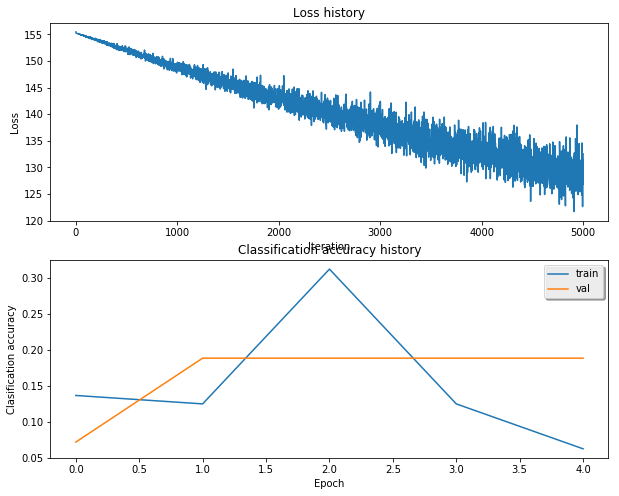

In [22]:
# Now, let's train a neural network
from cs231n.classifiers.neural_net import TwoLayerNet

input_size = 6
hidden_size = 300
num_classes = 128
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=5000, batch_size=32,
            learning_rate=3.8e-4, learning_rate_decay=0.95,
            reg=1e3, verbose=True)

# Predict on the validation set
val_err = np.sum(np.square(net.predict(X_val) - y_val), axis=1).mean()
print 'Validation error: ', val_err
test_err = np.sum(np.square(net.predict(X_test) - y_test), axis=1).mean()
print 'Test error: ', test_err

# Plot the loss function and train / validation errors
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
train = plt.plot(stats['train_acc_history'], label='train')
val = plt.plot(stats['val_acc_history'], label='val')
plt.legend(loc='upper right', shadow=True)
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

In [23]:
# Show some sample outputs:
print "Input - predicted chars - true chars"
X_print = X_test[:100]
res = net.predict(X_print)
for i in range(0,20):
    print int_list_to_string(X_print[i]) + " - "  \
        + int_list_to_string([res[i]]) \
        + " - " + int_list_to_string(y_test[i])

Input - predicted chars - true chars
icio, -   -  
cio,  -   - t
io, t -   - o
o, to -   -  
, to  -   - y
 to y -   - o
to yo -   - u
o you -   - .
    G -   - o
   Go -   - o
  Goo -   - d
 Good -   -  
Good  -   - m
ood m -   - a
od ma -   - s
d mas -   - t
 mast -   - e
maste -   - r
aster -   - ,
ster, -   -  


**It seems like this approach didn't work at all**